## Data Loading:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_2022=pd.read_excel('/workspaces/projects/TTC_Delay_Analysis/Data/ttc-bus-delay-data-2022.xlsx')
data_2023=pd.read_excel('/workspaces/projects/TTC_Delay_Analysis/Data/ttc-bus-delay-data-2023.xlsx')

## Data Cleaning:

### Data Preview:

In [6]:
data_2022.head()

Date Route   Time       Day                Location  \
0 2022-01-01   320  02:00  Saturday        YONGE AND DUNDAS   
1 2022-01-01   325  02:00  Saturday  OVERLEA AND THORCLIFFE   
2 2022-01-01   320  02:00  Saturday       YONGE AND STEELES   
3 2022-01-01   320  02:07  Saturday       YONGE AND STEELES   
4 2022-01-01   320  02:13  Saturday       YONGE AND STEELES   

                Incident  Min Delay  Min Gap Direction  Vehicle  
0          General Delay          0        0       NaN     8531  
1              Diversion        131      161         W     8658  
2  Operations - Operator         17       20         S        0  
3  Operations - Operator          4       11         S        0  
4  Operations - Operator          4        8         S        0

In [7]:
data_2023.head(5)

Date Route   Time     Day               Location  \
0 2023-01-01    91  02:30  Sunday  WOODBINE AND MORTIMER   
1 2023-01-01    69  02:34  Sunday         WARDEN STATION   
2 2023-01-01    35  03:06  Sunday           JANE STATION   
3 2023-01-01   900  03:14  Sunday        KIPLING STATION   
4 2023-01-01    85  03:43  Sunday         MEADOWALE LOOP   

                Incident  Min Delay  Min Gap Direction  Vehicle  
0              Diversion         81      111       NaN     8772  
1               Security         22       44         S     8407  
2  Cleaning - Unsanitary         30       60         N     1051  
3               Security         17       17       NaN     3334  
4               Security          1        1       NaN     1559

### Joining Dataset

In [5]:
# merging all the data into single dataframe
data=pd.concat([data_2022,data_2023], ignore_index=True)

In [6]:
# checking the sample of combined dataset
import datetime 
data.groupby(data.Date.dt.year).head(5)

Date Route   Time       Day                Location  \
0     2022-01-01   320  02:00  Saturday        YONGE AND DUNDAS   
1     2022-01-01   325  02:00  Saturday  OVERLEA AND THORCLIFFE   
2     2022-01-01   320  02:00  Saturday       YONGE AND STEELES   
3     2022-01-01   320  02:07  Saturday       YONGE AND STEELES   
4     2022-01-01   320  02:13  Saturday       YONGE AND STEELES   
58707 2023-01-01    91  02:30    Sunday   WOODBINE AND MORTIMER   
58708 2023-01-01    69  02:34    Sunday          WARDEN STATION   
58709 2023-01-01    35  03:06    Sunday            JANE STATION   
58710 2023-01-01   900  03:14    Sunday         KIPLING STATION   
58711 2023-01-01    85  03:43    Sunday          MEADOWALE LOOP   

                    Incident  Min Delay  Min Gap Direction  Vehicle  
0              General Delay          0        0       NaN     8531  
1                  Diversion        131      161         W     8658  
2      Operations - Operator         17       20         S        0  
3      Operations - Operator          4       11         S        0  
4      Operations - Operator          4        8         S        0  
58707              Diversion         81      111       NaN     8772  
58708               Security         22       44         S     8407  
58709  Cleaning - Unsanitary         30       60         N     1051  
58710               Security         17       17       NaN     3334  
58711               Security          1        1       NaN     1559



- Since our current dataset only has **Route** number, we are merging it with another datset which has both **Route Number** and **Route Name**

In [7]:
route_data = pd.read_csv('routes.csv', usecols=['route_short_name', 'route_long_name'])

In [8]:
route_data.rename(columns={'route_short_name': 'Route', 'route_long_name': 'Route Name'}, inplace=True)
route_data.head(5)

Route                 Route Name
0      1  LINE 1 (YONGE-UNIVERSITY)
1     10                  VAN HORNE
2    100            FLEMINGDON PARK
3    101             DOWNSVIEW PARK
4    102                MARKHAM RD.

In [9]:
data=data.merge(route_data,on='Route',how='left')
data.head(5)

Date Route   Time       Day                Location  \
0 2022-01-01   320  02:00  Saturday        YONGE AND DUNDAS   
1 2022-01-01   325  02:00  Saturday  OVERLEA AND THORCLIFFE   
2 2022-01-01   320  02:00  Saturday       YONGE AND STEELES   
3 2022-01-01   320  02:07  Saturday       YONGE AND STEELES   
4 2022-01-01   320  02:13  Saturday       YONGE AND STEELES   

                Incident  Min Delay  Min Gap Direction  Vehicle  \
0          General Delay          0        0       NaN     8531   
1              Diversion        131      161         W     8658   
2  Operations - Operator         17       20         S        0   
3  Operations - Operator          4       11         S        0   
4  Operations - Operator          4        8         S        0   

            Route Name  
0      YONGE NIGHT BUS  
1  DON MILLS NIGHT BUS  
2      YONGE NIGHT BUS  
3      YONGE NIGHT BUS  
4      YONGE NIGHT BUS

- We used the left join because if we do inner join we will lose data from our left table as our right table *"route-data"* don't have name of all the route number. Even without route name we can still do delay analysis using route number, so left join avoids losing the data.

**Checking the data info:**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109620 entries, 0 to 109619
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        109620 non-null  datetime64[ns]
 1   Route       108708 non-null  object        
 2   Time        109620 non-null  object        
 3   Day         109620 non-null  object        
 4   Location    109620 non-null  object        
 5   Incident    109620 non-null  object        
 6   Min Delay   109620 non-null  int64         
 7   Min Gap     109620 non-null  int64         
 8   Direction   90365 non-null   object        
 9   Vehicle     109620 non-null  int64         
 10  Route Name  107272 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 9.2+ MB


**Checking the Null Value:**

In [11]:
data.isna().sum()

Date              0
Route           912
Time              0
Day               0
Location          0
Incident          0
Min Delay         0
Min Gap           0
Direction     19255
Vehicle           0
Route Name     2348
dtype: int64

**Percentage of Missing Value:**

In [12]:
data.isna().sum()/len(data)*100

Date           0.000000
Route          0.831965
Time           0.000000
Day            0.000000
Location       0.000000
Incident       0.000000
Min Delay      0.000000
Min Gap        0.000000
Direction     17.565225
Vehicle        0.000000
Route Name     2.141945
dtype: float64

### Data Imputation:

In [13]:
# finding columns that has missing values less than or equal to threshold values
threshold=int(len(data)*0.05)
cols_to_drop=data.columns[(data.isna().sum()>0) & (data.isna().sum()<=threshold)]
cols_to_drop

Index(['Route', 'Route Name'], dtype='object')

Column ['Route', 'Route Name'] has missing values which are less than the threshold value(5% of total value). So instead of filling these rows having missing value, we will drop these records.

In [14]:
# removig the rows with NaN value if they are less than 5 %
data=data.dropna(subset=cols_to_drop)

In [15]:
# checking the NaN values
data.isna().sum()

Date              0
Route             0
Time              0
Day               0
Location          0
Incident          0
Min Delay         0
Min Gap           0
Direction     18117
Vehicle           0
Route Name        0
dtype: int64

- **Direction** Column has a lot of missing values.
- We wont use **Direction** Column for our delay analysis.
- We will drop this column

Removing **Direction** Column:

In [16]:
data=data.drop('Direction',axis=1)
data.head()

Date Route   Time       Day                Location  \
0 2022-01-01   320  02:00  Saturday        YONGE AND DUNDAS   
1 2022-01-01   325  02:00  Saturday  OVERLEA AND THORCLIFFE   
2 2022-01-01   320  02:00  Saturday       YONGE AND STEELES   
3 2022-01-01   320  02:07  Saturday       YONGE AND STEELES   
4 2022-01-01   320  02:13  Saturday       YONGE AND STEELES   

                Incident  Min Delay  Min Gap  Vehicle           Route Name  
0          General Delay          0        0     8531      YONGE NIGHT BUS  
1              Diversion        131      161     8658  DON MILLS NIGHT BUS  
2  Operations - Operator         17       20        0      YONGE NIGHT BUS  
3  Operations - Operator          4       11        0      YONGE NIGHT BUS  
4  Operations - Operator          4        8        0      YONGE NIGHT BUS

**Number of Missing Value in each Column:**

In [17]:
data.isna().sum()

Date          0
Route         0
Time          0
Day           0
Location      0
Incident      0
Min Delay     0
Min Gap       0
Vehicle       0
Route Name    0
dtype: int64

- We will ignore the Route Name for now because if route names are not available we can use route number for delay analysis.

### Data Duplication:

In [18]:
# checking the duplicates rows
print(f"Number of Duplicate Records: {data.duplicated().sum()}")
# print(data.shape)

Number of Duplicate Records: 735


<!-- removing the duplicates records -->
Since we have **438 duplicates values**. So we are removing all of these rows.

In [19]:
# removing the duplicates records
data.drop_duplicates()
print(f"Dataset after removing Duplicates: {data.shape[0]}")

Dataset after removing Duplicates: 107272


### Data Filtering:

In [20]:
# removing data which has no delay
data=data[data['Min Delay']!=0]

- We are analyzing the Delay in TTC. Therefore we dont need records where **Min Delay** is 0 for our analysis, so we are getting rid of these records as well

In [21]:
print(f"Final Dataset Records: {data.shape[0]}")

Final Dataset Records: 101831


## Feature Engineering:

In [22]:
# Convert the 'date_column' to datetime 
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, and day into separate columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day_Num'] = data['Date'].dt.day


In [23]:
# Replace numerical month values with month names
data['Month'].replace({1: 'January', 2: 'February', 3: 'March',
                       4: 'April', 5: 'May', 6: 'June',
                       7: 'July', 8: 'August', 9: 'September',
                       10: 'October', 11: 'November', 12: 'December'}, inplace=True)


In [24]:
data.head()

Date Route   Time       Day                Location  \
1 2022-01-01   325  02:00  Saturday  OVERLEA AND THORCLIFFE   
2 2022-01-01   320  02:00  Saturday       YONGE AND STEELES   
3 2022-01-01   320  02:07  Saturday       YONGE AND STEELES   
4 2022-01-01   320  02:13  Saturday       YONGE AND STEELES   
5 2022-01-01   363  02:16  Saturday           KING AND SHAW   

                Incident  Min Delay  Min Gap  Vehicle           Route Name  \
1              Diversion        131      161     8658  DON MILLS NIGHT BUS   
2  Operations - Operator         17       20        0      YONGE NIGHT BUS   
3  Operations - Operator          4       11        0      YONGE NIGHT BUS   
4  Operations - Operator          4        8        0      YONGE NIGHT BUS   
5  Operations - Operator         30       60        0  OSSINGTON NIGHT BUS   

   Year    Month  Day_Num  
1  2022  January        1  
2  2022  January        1  
3  2022  January        1  
4  2022  January        1  
5  2022  January        1

## Data Visualization:

/tmp/ipykernel_63060/2405955581.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Min Delay', y='Route Name', data=df, palette=colors,legend=False)


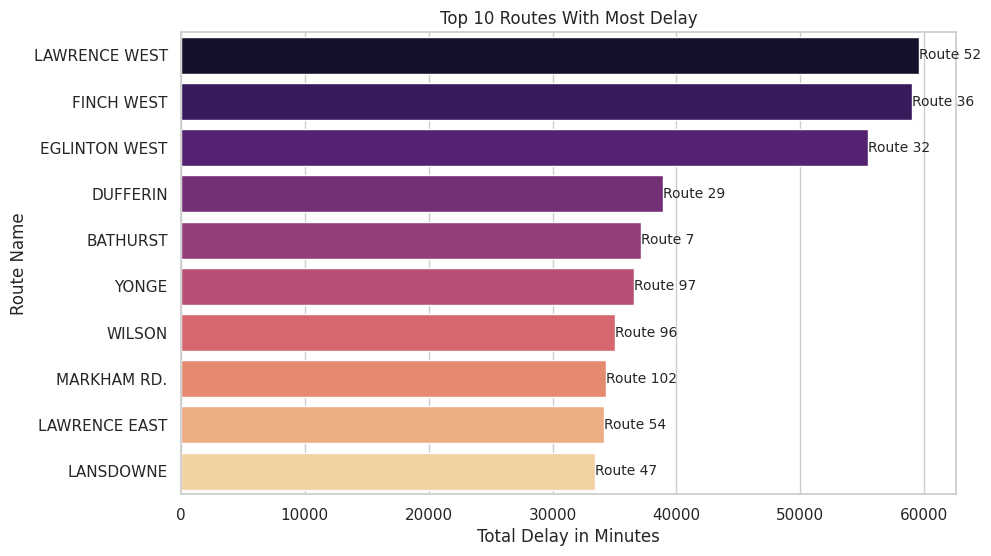

In [25]:
total_delay = data.groupby('Route')['Min Delay'].sum()
total_delay = pd.DataFrame(total_delay)

# Sort total_delay in descending order
max_delay = total_delay.sort_values('Min Delay', ascending=False)

# Merge with route_data to get route names
df = max_delay.merge(route_data, on='Route', how='left')
df = df.sort_values(by='Min Delay', ascending=False).head(10)

# Create a color map based on the Min Delay values
colors = sns.color_palette("magma", n_colors=len(df))

# Set the style
sns.set(style='whitegrid')

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Min Delay', y='Route Name', data=df, palette=colors,legend=False)

# Display the route numbers on top of the bars
for index, value in enumerate(df['Min Delay']):
    bar_plot.text(value, index, f'Route {df["Route"].iloc[index]}', ha='left', va='center', fontsize=10)

# Customize the plot
plt.title('Top 10 Routes With Most Delay')
plt.xlabel('Total Delay in Minutes')
plt.ylabel('Route Name')

# Show the plot
plt.show()

- Station with Maximum Delay: **Lawrence West, Finch West, Eglinton West** 
- Station with Minimum Delay: **Lansdowne,Lawrence East,Markham Rd**

/tmp/ipykernel_63060/2097523684.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Month', y='Min Delay', data=delay_chart, order=months_order, palette=colors)
/tmp/ipykernel_63060/2097523684.py:19: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x='Month', y='Min Delay', data=delay_chart, order=months_order, palette=colors)


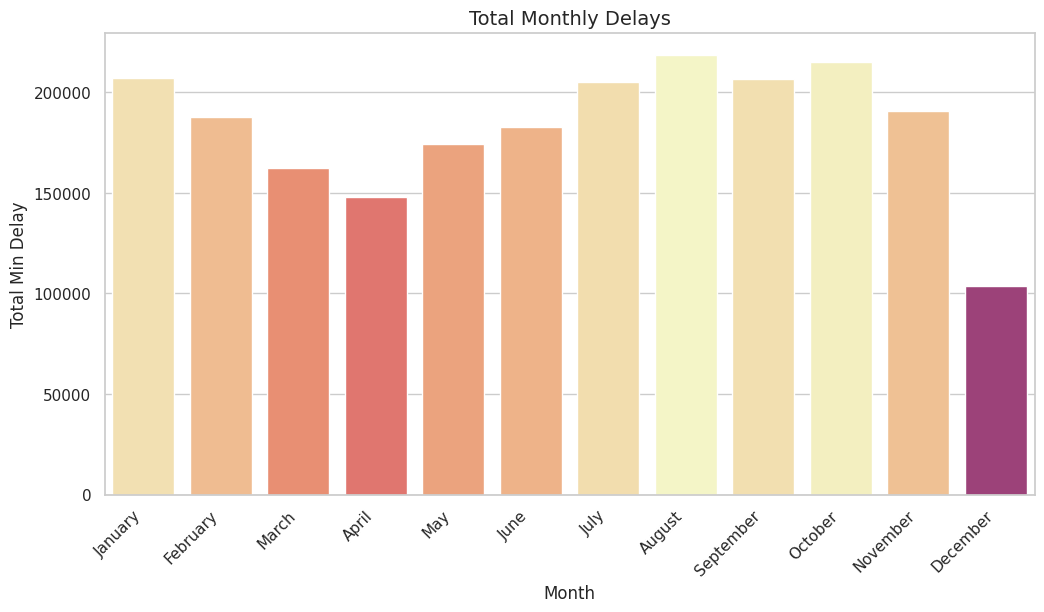

In [26]:
# Extract relevant columns
months_order=['January', 'February', 'March', 'April', 'May', 'June',
              'July','August', 'September', 'October', 'November', 'December']
delay_month = data[['Month', 'Min Delay']]

# Group by month and sum the delays
delay_month_sum = delay_month.groupby('Month')['Min Delay'].sum().reindex(months_order)

# Create a DataFrame for the chart
delay_chart = pd.DataFrame({'Month': delay_month_sum.index, 'Min Delay': delay_month_sum.values})

# Set a color palette (you can choose another one based on your preference)
colors = plt.cm.magma(delay_chart['Min Delay'] / delay_chart['Min Delay'].max())

# Set a larger figure size for better visibility
plt.figure(figsize=(12, 6))

# Create a bar plot
ax = sns.barplot(x='Month', y='Min Delay', data=delay_chart, order=months_order, palette=colors)

# Set plot labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Min Delay', fontsize=12)
plt.title('Total Monthly Delays', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

/tmp/ipykernel_63060/443063349.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Day', y='Min Delay', data=delay_day, order=days_order, palette=colors)


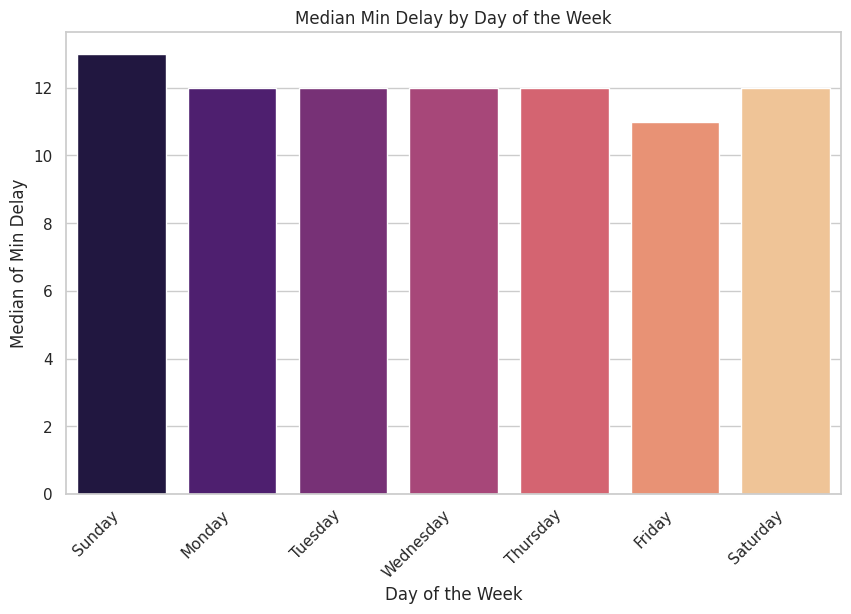

In [27]:

days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
# Group by day and calculate the median delay
delay_day = pd.DataFrame(data.groupby('Day')['Min Delay'].median().reindex(days_order))

# Reset index
delay_day = delay_day.reset_index()

# Create a color palette
colors = sns.color_palette("magma", len(delay_day))

# Set a larger figure size for better visibility
plt.figure(figsize=(10, 6))

# Create a bar plot
ax = sns.barplot(x='Day', y='Min Delay', data=delay_day, order=days_order, palette=colors)

# Customize plot aesthetics
ax.set(xlabel='Day of the Week', ylabel='Median of Min Delay')
ax.set_title('Median Min Delay by Day of the Week')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

- On weekend (**Saturday and Sunday**), median of Min delay is around 13 Minutes which is also the highest delay.
- On **Wednesday and Friday**, the median of Min Delay is around 11 Minutes which is also the lowest.

/tmp/ipykernel_63060/3255593587.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['Incident'], data=data, order=data['Incident'].value_counts().index, palette='magma')
/tmp/ipykernel_63060/3255593587.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.values, y=df.index, palette="magma")


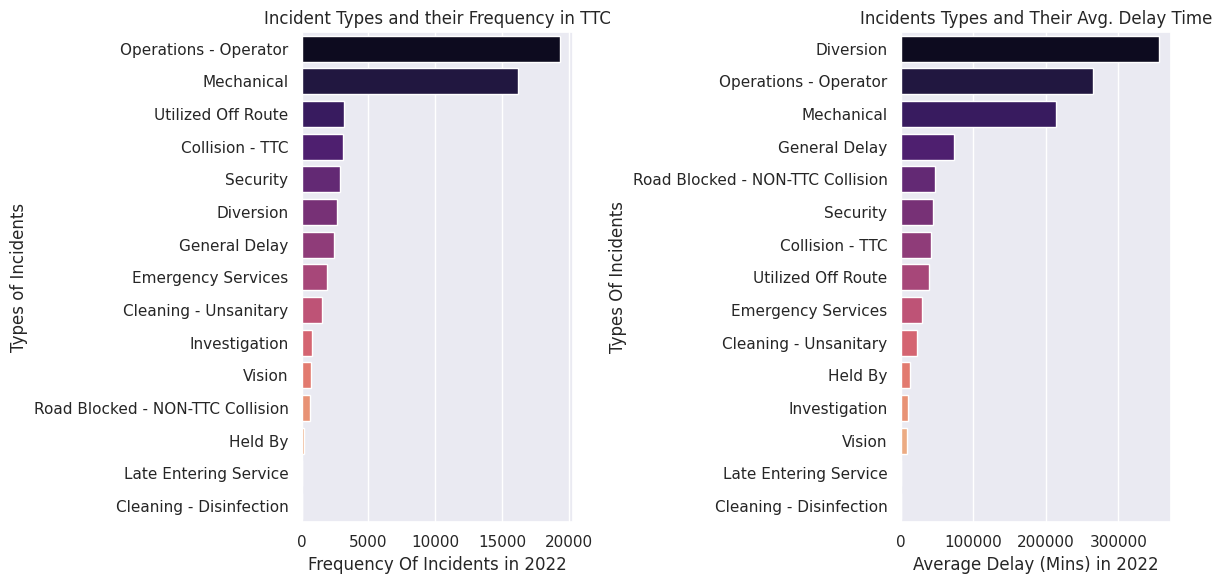

/tmp/ipykernel_63060/3255593587.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['Incident'], data=data, order=data['Incident'].value_counts().index, palette='magma')
/tmp/ipykernel_63060/3255593587.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.values, y=df.index, palette="magma")


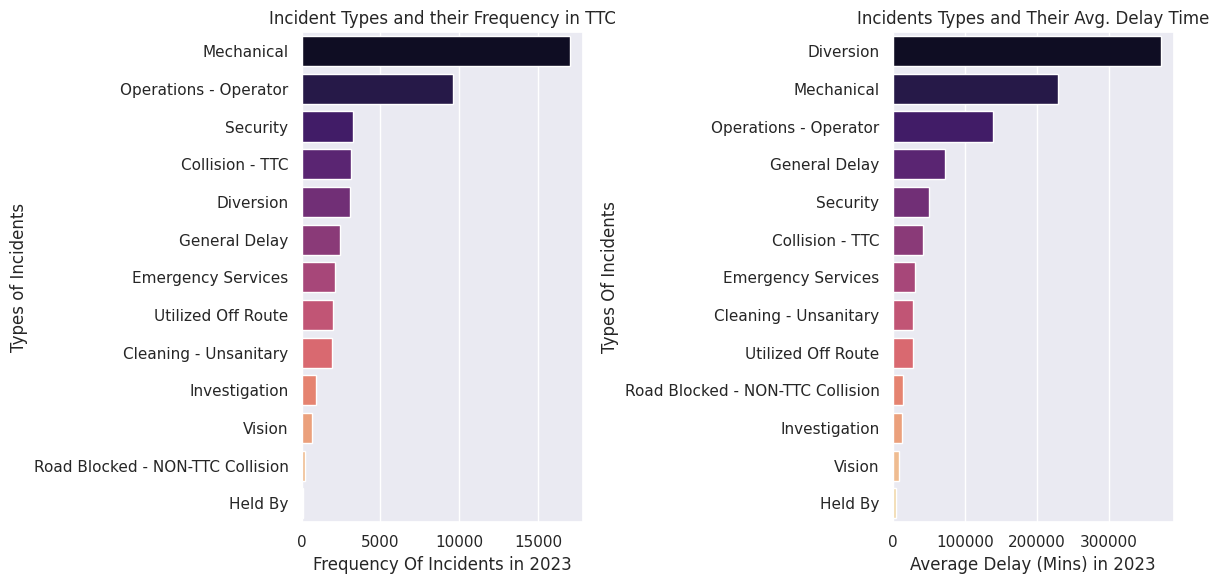

In [28]:
def incidents(data, year):
    data = data[data['Year'] == year]
    plt.figure(figsize=(12, 6))
    sns.set_style('darkgrid')

    # Create the first subplot on the left
    plt.subplot(1, 2, 1)
    sns.countplot(y=data['Incident'], data=data, order=data['Incident'].value_counts().index, palette='magma')
    plt.title("Incident Types and their Frequency in TTC")
    plt.xlabel('Frequency Of Incidents in {}'.format(year))
    plt.ylabel('Types of Incidents')

    # Second chart - incident contribution in delay
    # Create the second subplot on the right
    plt.subplot(1, 2, 2)
    df = data.groupby('Incident')['Min Delay'].sum()
    df = df.sort_values(ascending=False)

    sns.barplot(x=df.values, y=df.index, palette="magma")
    plt.ylabel('Types Of Incidents')
    plt.xlabel('Average Delay (Mins) in {}'.format(year))
    plt.title('Incidents Types and Their Avg. Delay Time')

    # Ensures proper spacing between subplots
    plt.tight_layout()
    plt.show()

# Example usage
incidents(data, 2022)
incidents(data,2023)

In [29]:
def main():
       
    POD = data['Time'].astype(str)

    # Split the time values into hours, minutes
    result = POD.str.split(':', expand=True)
    data['Hour'] = result[0].astype(int)
    data['Minute'] = result[1].astype(int)
    result=result[0].astype(int)
    
    #converting into integers
    result = result.astype(int)  
    
    # Apply parts_of_day to each element in the Series using apply
    time_div = result.apply(parts_of_day)
    data['day_part']=time_div
    
# dividing hours of the day into different parts
def parts_of_day(time):
    if 5 <= time <= 11:
        return "Morning"
    elif 12 <= time <= 16:
        return "Afternoon"
    elif 17 <= time <= 20:
        return "Evening"
    else:
        return "Night"
    
main()

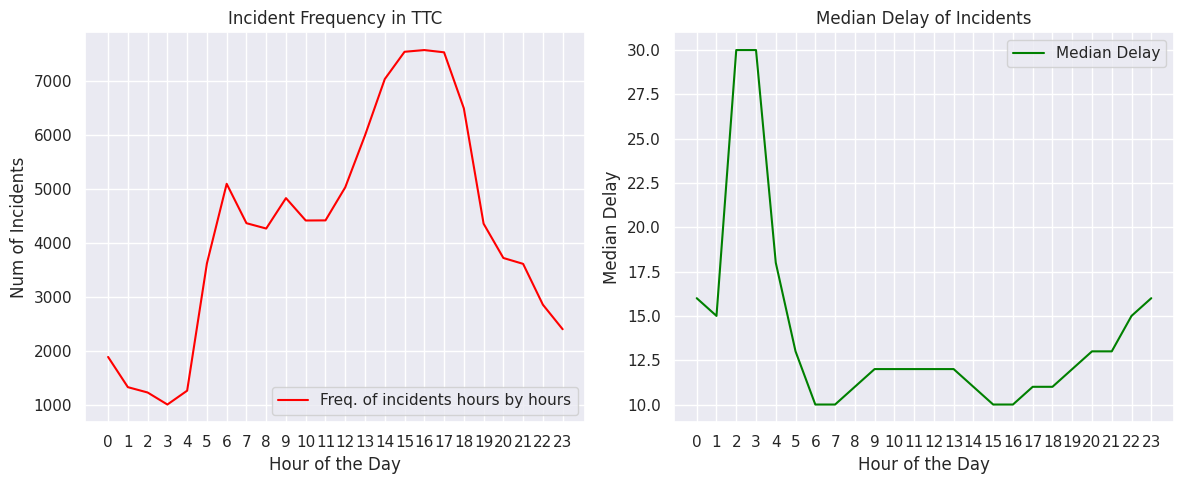

In [30]:
# Group by 'Hour' and calculate the median delay
df_mean = data.groupby('Hour')['Min Delay'].median().reset_index()
df_num = data.groupby('Hour')['Min Delay'].count().reset_index()

# Create subplots in a row
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

sns.set_style('darkgrid')

# First subplot
sns.lineplot(data=df_num, x='Hour', y='Min Delay', label='Freq. of incidents hours by hours', color='red', ax=axes[0])
axes[0].set_xticks(np.arange(0, 24))  # Set x-axis ticks for all 24 hours
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel('Num of Incidents')
axes[0].set_title("Incident Frequency in TTC")

# Second subplot
sns.lineplot(data=df_mean, x='Hour', y='Min Delay', label='Median Delay', color='green', ax=axes[1])
axes[1].set_xticks(np.arange(0, 24))  # Set x-axis ticks for all 24 hours
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Median Delay')
axes[1].set_title('Median Delay of Incidents')

# Ensures proper spacing between subplots
plt.tight_layout()
plt.show()


- In first graph, we can see that, between **14(2PM) to 17(5PM)**, the frequency of delays is **maximum**. It indicates that, during this time delays occurs in a lot of TTC Stations.
- The Frequency of delay between **7 PM to 11 PM** is medium and after **7PM(17)** in the evening, the frequency of delay starts decreasing sharply.
- From the second graph, we can seet that at **4PM** the average delay is **Minimum** and at **2AM** the average delay is **Maximum**.
- In the morning between **6AM to 9AM**, the average delay sharply increases.
- During the day, from **1PM to 5PM**, the average delay time period is at its lowest which is very **surprising** because we can see from the first graph that during this time the frequency of delay in TTC Stations is at its maximum. It possible that during this time period delay of small time oeriod occurs in almost all the TTC stations however the delay period could be very short as a result the average delay in this period is very low.
- After **6PM** in the Evening, again the average delay sharply increases.

/tmp/ipykernel_63060/2325893091.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='day_part', y='Min Delay', palette=colors)
/tmp/ipykernel_63060/2325893091.py:14: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(data=df, x='day_part', y='Min Delay', palette=colors)


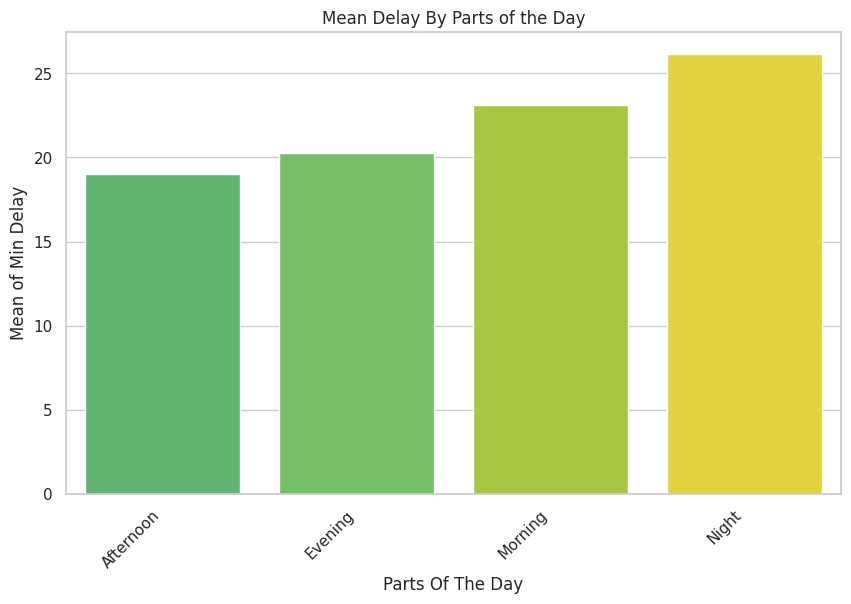

In [31]:
# Group by 'day_part' and calculate the mean delay
df = data.groupby('day_part')['Min Delay'].mean().reset_index()

# Create a color palette
colors = sns.color_palette("viridis", as_cmap=True)(df['Min Delay'] / df['Min Delay'].max())

# Set the style and palette for the plot
sns.set_style('whitegrid')

# Set a larger figure size for better visibility
plt.figure(figsize=(10, 6))

# Create the bar chart with color contrast based on delay using sns.barplot
ax = sns.barplot(data=df, x='day_part', y='Min Delay', palette=colors)

# Add x and y labels
ax.set(xlabel="Parts Of The Day", ylabel="Mean of Min Delay")

# Set the title
plt.title("Mean Delay By Parts of the Day")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


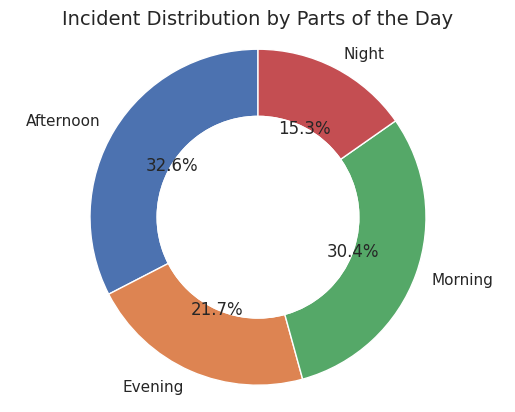

In [32]:
# Count the number of incidents in different parts of the day
df = data.groupby(['day_part'])['Incident'].count()

# Set the grid style
sns.set_style('whitegrid')

# Create a donut chart
fig, ax = plt.subplots()

# Use a pie chart with a white circle in the center to make it a donut chart
ax.pie(df, labels=df.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'))

# Draw a circle in the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle
ax.axis('equal')

# Set a title
plt.title("Incident Distribution by Parts of the Day", fontsize=14)

# Show the plot
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


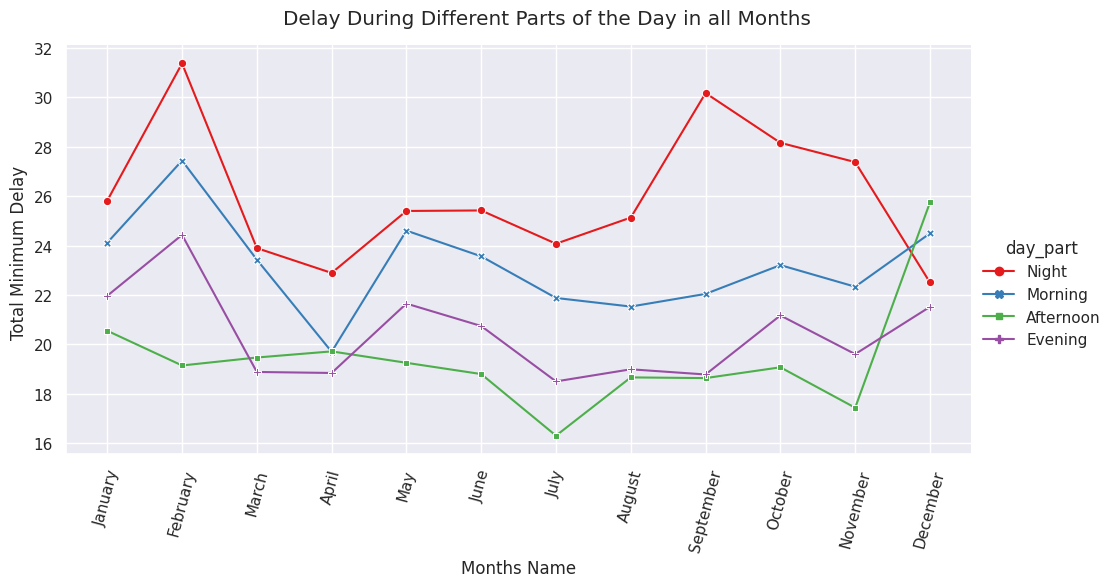

In [33]:
# Group by 'Month' and calculate the sum of 'Min Delay'
df = data.groupby('Month')['Min Delay'].mean()

# Define a custom color palette mapping 'day_part' values to colors
custom_palette = sns.color_palette("Set1", n_colors=len(data['day_part'].unique()))

# Set the style and custom color palette
sns.set_style('darkgrid')
sns.set_palette(custom_palette)

g = sns.relplot(data=data, kind='line', y='Min Delay', x='Month', hue='day_part',style='day_part',
                aspect=2, markers=True, ci=None, dashes=False)

g.fig.suptitle("Delay During Different Parts of the Day in all Months", y=1.03)
g.set(xlabel='Months Name',
      ylabel='Total Minimum Delay ')

# Rotate the x-axis labels
plt.xticks(rotation=75)

# Show the plot
plt.show()


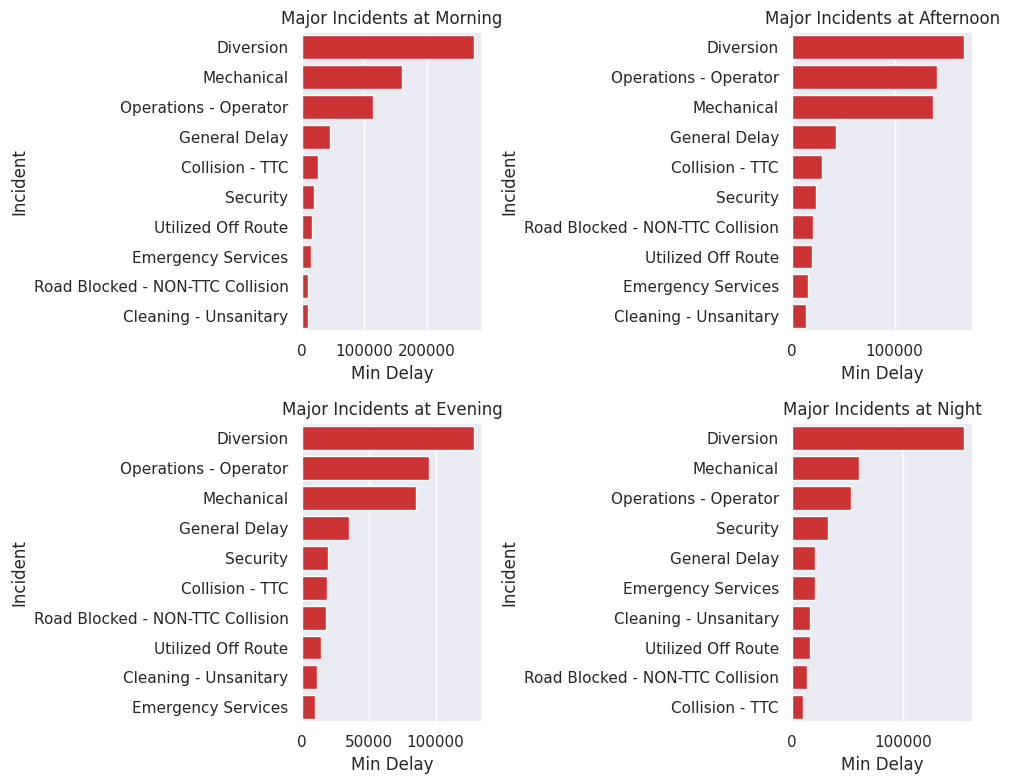

In [34]:
# df.day_time.unique()
df=data
# Create subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.title('Most Common Incidents During Different Parts of the day')
# Plot for 'Morning'
morning = df.loc[df['day_part'] == 'Morning']
morning_events = morning.groupby(['Incident'])['Min Delay'].sum().reset_index()
morning_events = morning_events.sort_values('Min Delay', ascending=False).head(10)
sns.barplot(data=morning_events, x='Min Delay', y='Incident', ax=axes[0, 0])
axes[0, 0].set_title('Major Incidents at Morning')

# Plot for 'Afternoon'
afternoon = df.loc[df['day_part'] == 'Afternoon']
afternoon_events = afternoon.groupby(['Incident'])['Min Delay'].sum().reset_index()
afternoon_events = afternoon_events.sort_values('Min Delay', ascending=False).head(10)
sns.barplot(data=afternoon_events, x='Min Delay', y='Incident', ax=axes[0, 1])
axes[0, 1].set_title('Major Incidents at Afternoon')

# Plot for 'Evening'
evening = df.loc[df['day_part'] == 'Evening']
evening_events = evening.groupby(['Incident'])['Min Delay'].sum().reset_index()
evening_events = evening_events.sort_values('Min Delay', ascending=False).head(10)
sns.barplot(data=evening_events, x='Min Delay', y='Incident', ax=axes[1, 0])
axes[1, 0].set_title('Major Incidents at Evening')

# Plot for 'Night'
night = df.loc[df['day_part'] == 'Night']
night_events = night.groupby(['Incident'])['Min Delay'].sum().reset_index()
night_events = night_events.sort_values('Min Delay', ascending=False).head(10)

sns.set_style('darkgrid')
sns.barplot(data=night_events, x='Min Delay', y='Incident', ax=axes[1, 1])
axes[1, 1].set_title('Major Incidents at Night')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [35]:
# removing records whose Vehicle Number is 0 as its not releastic to have vehicle no as 0
df=data[data['Vehicle']!=0]

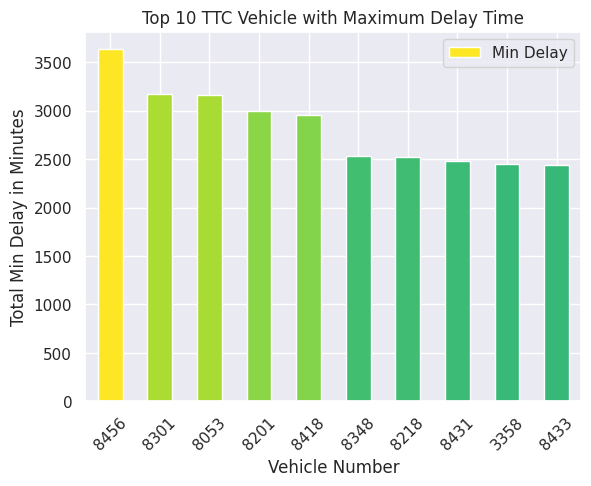

In [36]:
df=df.groupby('Vehicle')['Min Delay'].sum().sort_values(ascending=False).reset_index()

# Create a gradient color map based on the Min Delay values
colors = plt.cm.viridis(df['Min Delay'] / df['Min Delay'].max())

# Update the 'df' DataFrame with reset_index()
df = df.reset_index()

# grid style
sns.set_style('darkgrid')

# Create the bar chart with color contrast based on delay
ax = df.head(10).plot(kind='bar', rot=45, x='Vehicle', y='Min Delay', color=colors)
plt.xlabel('Vehicle Number')
plt.ylabel('Total Min Delay in Minutes')
plt.title('Top 10 TTC Vehicle with Maximum Delay Time')
plt.show()

## Summary:

In [37]:
cols = data.columns.to_list()
cols

['Date',
 'Route',
 'Time',
 'Day',
 'Location',
 'Incident',
 'Min Delay',
 'Min Gap',
 'Vehicle',
 'Route Name',
 'Year',
 'Month',
 'Day_Num',
 'Hour',
 'Minute',
 'day_part']

## Time Series Analysis

In [38]:
df = data[['Date','Min Delay']]
df

Date  Min Delay
1      2022-01-01        131
2      2022-01-01         17
3      2022-01-01          4
4      2022-01-01          4
5      2022-01-01         30
...           ...        ...
109615 2023-11-30         10
109616 2023-11-30         24
109617 2023-11-30         10
109618 2023-11-30         11
109619 2023-11-30         10

[101831 rows x 2 columns]

In [39]:
from prophet import Prophet

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
df.columns = ['ds','y']

In [41]:
# Assuming df is your DataFrame with 'ds' and 'y' columns
m = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True, weekly_seasonality=True)
m.add_seasonality(name='monthly', period=30.44, fourier_order=5)  # Adjust period based on your data
m.fit(df)

08:19:27 - cmdstanpy - INFO - Chain [1] start processing
08:19:38 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
future = m.make_future_dataframe(periods=365)

In [43]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
1059 2024-11-25  22.419267  -51.201205   94.848170
1060 2024-11-26  19.953446  -54.097068   90.626010
1061 2024-11-27  20.679801  -59.260704   91.074886
1062 2024-11-28  18.194953  -51.461762   88.275808
1063 2024-11-29  18.654122  -49.718496   86.423478

In [44]:
import plotly.graph_objects as go
import seaborn as sns

# Assuming `m` is your model and `forecast` is your forecast data

# Set Seaborn style
sns.set(style="whitegrid")

# Create a Plotly figure
fig = go.Figure()

# Plot only the forecast line
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast', line=dict(color='blue')))

# Set y-axis limits
fig.update_yaxes(range=[0, 40])

# Customize legend
fig.update_layout(legend=dict(x=0, y=1, traceorder="normal", orientation="h"))

# Set the title
fig.update_layout(title_text='Delay Forecast')

# Show the plot
fig.show()

In [45]:
forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2022-01-01  23.253323  -42.006894   84.476392    23.253323    23.253323   
1    2022-01-02  23.271105  -42.372205   88.202450    23.271105    23.271105   
2    2022-01-03  23.288886  -46.345446   86.130852    23.288886    23.288886   
3    2022-01-04  23.306667  -53.992898   78.576186    23.306667    23.306667   
4    2022-01-05  23.324448  -47.361879   81.094147    23.324448    23.324448   
...         ...        ...         ...         ...          ...          ...   
1059 2024-11-25  21.417656  -51.201205   94.848170    -8.232011    45.870178   
1060 2024-11-26  21.418303  -54.097068   90.626010    -8.374552    45.964127   
1061 2024-11-27  21.418950  -59.260704   91.074886    -8.517093    46.064677   
1062 2024-11-28  21.419597  -51.461762   88.275808    -8.659634    46.165227   
1063 2024-11-29  21.420244  -49.718496   86.423478    -8.804890    46.275881   

       monthly  monthly_lower  monthly_upper  multiplicative_terms  ...  \
0    -0.013837      -0.013837      -0.013837             -0.177066  ...   
1    -0.018452      -0.018452      -0.018452             -0.141104  ...   
2    -0.022510      -0.022510      -0.022510             -0.213212  ...   
3    -0.020048      -0.020048      -0.020048             -0.287186  ...   
4    -0.015770      -0.015770      -0.015770             -0.201020  ...   
...        ...            ...            ...                   ...  ...   
1059  0.108549       0.108549       0.108549              0.046766  ...   
1060  0.062442       0.062442       0.062442             -0.068393  ...   
1061  0.009034       0.009034       0.009034             -0.034509  ...   
1062 -0.024892      -0.024892      -0.024892             -0.150546  ...   
1063 -0.031014      -0.031014      -0.031014             -0.129136  ...   

        weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0     0.028701      0.028701      0.028701 -0.191930     -0.191930   
1     0.078816      0.078816      0.078816 -0.201468     -0.201468   
2     0.017628      0.017628      0.017628 -0.208331     -0.208331   
3    -0.054832     -0.054832     -0.054832 -0.212306     -0.212306   
4     0.027994      0.027994      0.027994 -0.213244     -0.213244   
...        ...           ...           ...       ...           ...   
1059  0.017628      0.017628      0.017628 -0.079411     -0.079411   
1060 -0.054832     -0.054832     -0.054832 -0.076003     -0.076003   
1061  0.027994      0.027994      0.027994 -0.071538     -0.071538   
1062 -0.059643     -0.059643     -0.059643 -0.066012     -0.066012   
1063 -0.038665     -0.038665     -0.038665 -0.059457     -0.059457   

      yearly_upper  additive_terms  additive_terms_lower  \
0        -0.191930             0.0                   0.0   
1        -0.201468             0.0                   0.0   
2        -0.208331             0.0                   0.0   
3        -0.212306             0.0                   0.0   
4        -0.213244             0.0                   0.0   
...            ...             ...                   ...   
1059     -0.079411             0.0                   0.0   
1060     -0.076003             0.0                   0.0   
1061     -0.071538             0.0                   0.0   
1062     -0.066012             0.0                   0.0   
1063     -0.059457             0.0                   0.0   

      additive_terms_upper       yhat  
0                      0.0  19.135956  
1                      0.0  19.987459  
2                      0.0  18.323418  
3                      0.0  16.613313  
4                      0.0  18.635772  
...                    ...        ...  
1059                   0.0  22.419267  
1060                   0.0  19.953446  
1061                   0.0  20.679801  
1062                   0.0  18.194953  
1063                   0.0  18.654122  

[1064 rows x 22 columns]

/home/codespace/.python/current/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/codespace/.python/current/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/codespace/.python/current/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/codespace/.python/c

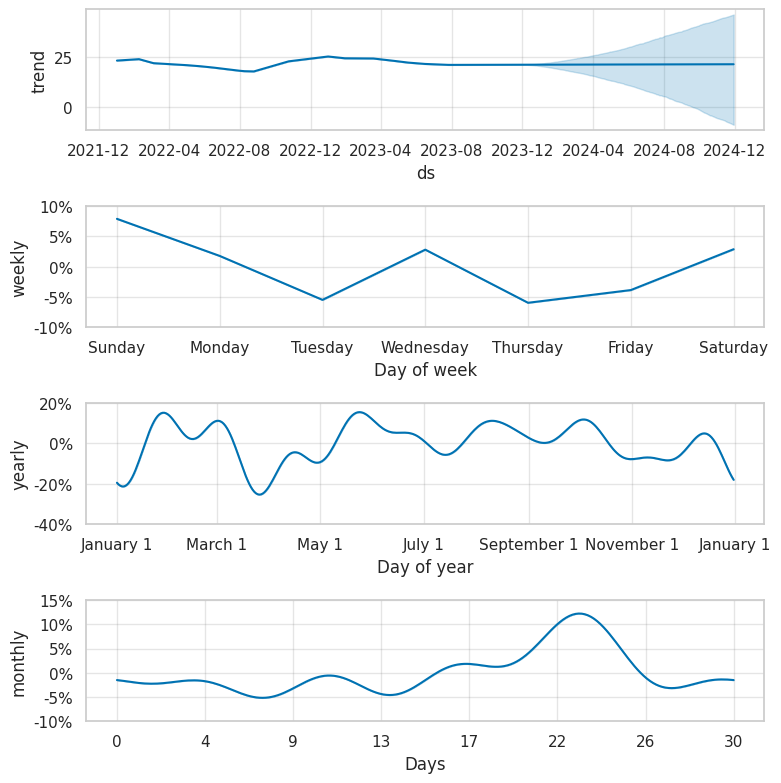

In [46]:
fig2 = m.plot_components(forecast , figsize=(8,8))

In [47]:
data.to_csv('data.csv', index=False)